In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
fast_ll_ctime = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_LL_create_timeline_2500000_100000.csv", names=['time']).reset_index()
fast_ll_ctime['name'] = 'fast'

fast_l6u_ctime = pd.read_csv("../results_03_01/FAST_KNN_NO_ObjIndex_lessLevels6_create_timeline_2500000_100000.csv", names=['time']).reset_index()
fast_l6u_ctime['name'] = 'fast (levels-6 / early-stop)'

fast_l6_ctime = pd.read_csv("../results_03_01/FAST_KNN_NO_ObjIndex_lessLevels6fix_create_timeline_2500000_100000.csv", names=['time']).reset_index()
fast_l6_ctime['name'] = 'fast (levels-6)'

ck_ctime = pd.read_csv("../results/CkQST_KNN_NO_create_timeline_2500000_100000.csv", names=['time']).reset_index()
ck_ctime['name'] = 'ckqst'

create_time = pd.concat([fast_l6_ctime, fast_l6u_ctime])
create_time['time'] = create_time['time'] / 1000000
create_time['time'] = create_time['time'].apply(lambda x: 0 if x < 0 else x)

fast_ll_stime = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_LL_search_timeline_2500000_100000.csv", names=['time']).reset_index()
fast_ll_stime['name'] = 'fast'

fast_l6u_stime = pd.read_csv("../results_03_01/FAST_KNN_NO_ObjIndex_lessLevels6_search_timeline_2500000_100000.csv", names=['time']).reset_index()
fast_l6u_stime['name'] = 'fast (levels-6 / early-stop)'

fast_l6_stime = pd.read_csv("../results_03_01/FAST_KNN_NO_ObjIndex_lessLevels6fix_search_timeline_2500000_100000.csv", names=['time']).reset_index()
fast_l6_stime['name'] = 'fast (levels-6)'

ck_stime = pd.read_csv("../results/CkQST_KNN_NO_search_timeline_2500000_100000.csv", names=['time']).reset_index()
ck_stime['name'] = 'ckqst (baseline)'

search_time = pd.concat([fast_l6_stime, fast_l6u_stime])
search_time['time'] = search_time['time'] / 1000000
search_time['time'] = search_time['time'].apply(lambda x: 0 if x < 0 else x)

fast_ll_summary = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_LL.csv")[-1:]
fast_ll_summary['name'] = 'fast'
ck_summary = pd.read_csv("../results/CkQST_KNN_NO.csv")[-1:]
ck_summary['name'] = 'ckqst (baseline)'
summary = pd.concat([fast_ll_summary, ck_summary])

create_time

,index,time,name
0,0,12.661476,fast (levels-6)
1,1,6.504485,fast (levels-6)
2,2,0.271269,fast (levels-6)
3,3,0.179186,fast (levels-6)
4,4,0.508308,fast (levels-6)
...,...,...,...
2499995,2499995,0.526954,fast (levels-6 / early-stop)
2499996,2499996,0.056455,fast (levels-6 / early-stop)
2499997,2499997,0.498809,fast (levels-6 / early-stop)
2499998,2499998,0.014443,fast (levels-6 / early-stop)


# Total time

Text(0, 0.5, 'Index creation time (sec)')

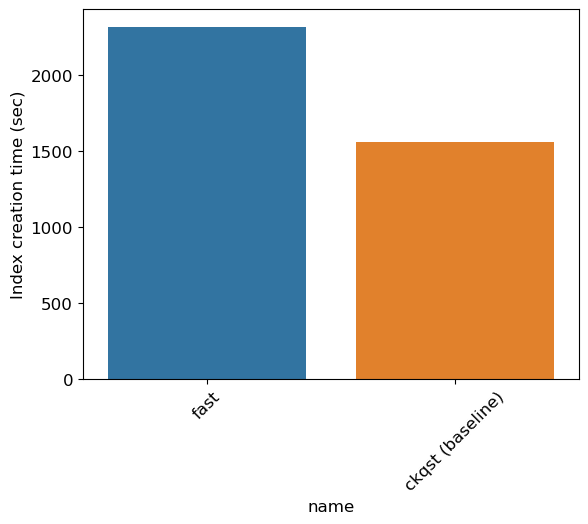

In [3]:
total_ctime = summary.loc[:, ['name', 'creation_time']]
total_ctime['creation_time'] = total_ctime['creation_time'] / (1000000000)
sns.barplot(x='name', y='creation_time', data=total_ctime)
plt.xticks(rotation=45)
plt.ylabel('Index creation time (sec)')

Text(0, 0.5, 'Avg. object matching time (milis)')

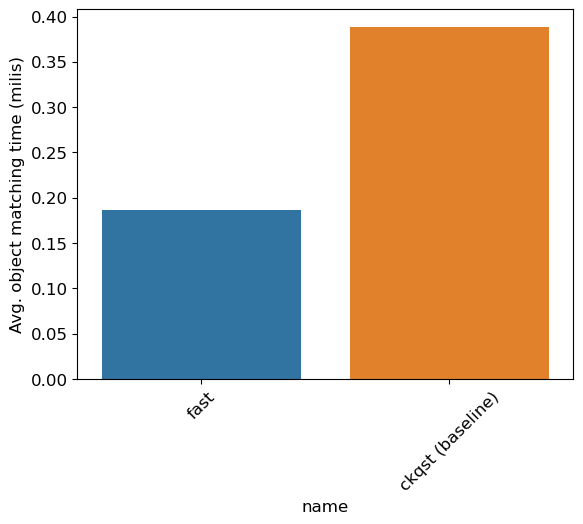

In [4]:
total_stime = summary.loc[:, ['name', 'search_time']]
total_stime['search_time'] = total_stime['search_time'] / (100000 * 1000000)
sns.barplot(x='name', y='search_time', data=total_stime)
plt.xticks(rotation=45)
plt.ylabel('Avg. object matching time (milis)')

## Creation time

(0.0, 10.0)

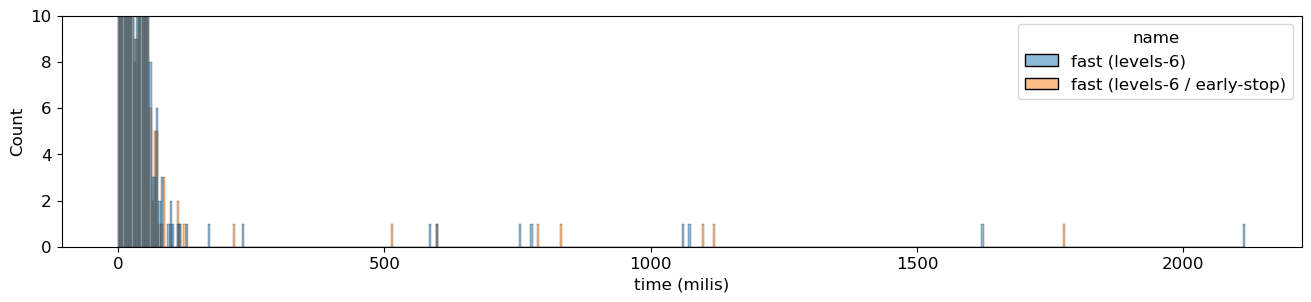

In [5]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='name', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [6]:
miserable_queries = create_time[create_time['time'] > 50].sort_values('time', ascending=False)
miserable_queries

,index,time,name
1987470,1987470,2115.852135,fast (levels-6)
2125107,2125107,1776.205492,fast (levels-6 / early-stop)
2125107,2125107,1622.738780,fast (levels-6)
1888784,1888784,1117.949632,fast (levels-6 / early-stop)
2310390,2310390,1097.519257,fast (levels-6 / early-stop)
...,...,...,...
1421066,1421066,50.578220,fast (levels-6 / early-stop)
2220416,2220416,50.382791,fast (levels-6)
942349,942349,50.129002,fast (levels-6 / early-stop)
1510162,1510162,50.104537,fast (levels-6)


Text(0, 0.5, 'time (milis)')

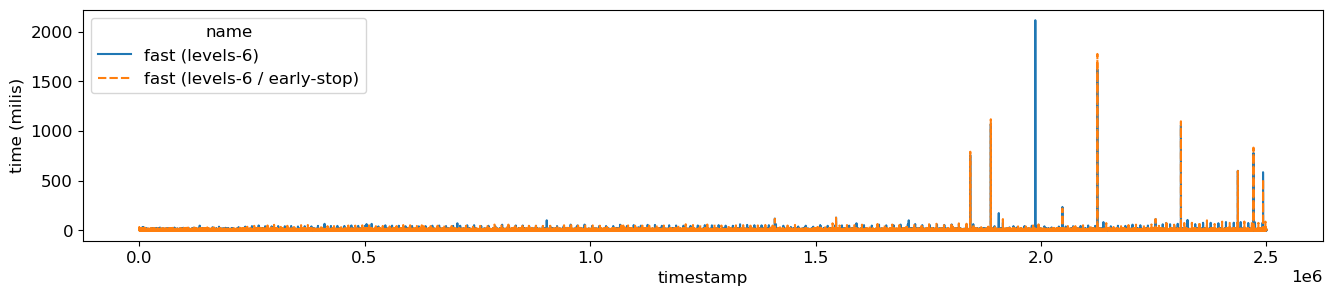

In [7]:
# step = 500000
# for i in range(0, 2500000, step):
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='name', style='name', data=create_time)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')

Relative time (FAST vs CkQST)

Text(0, 0.5, 'time (milis)')

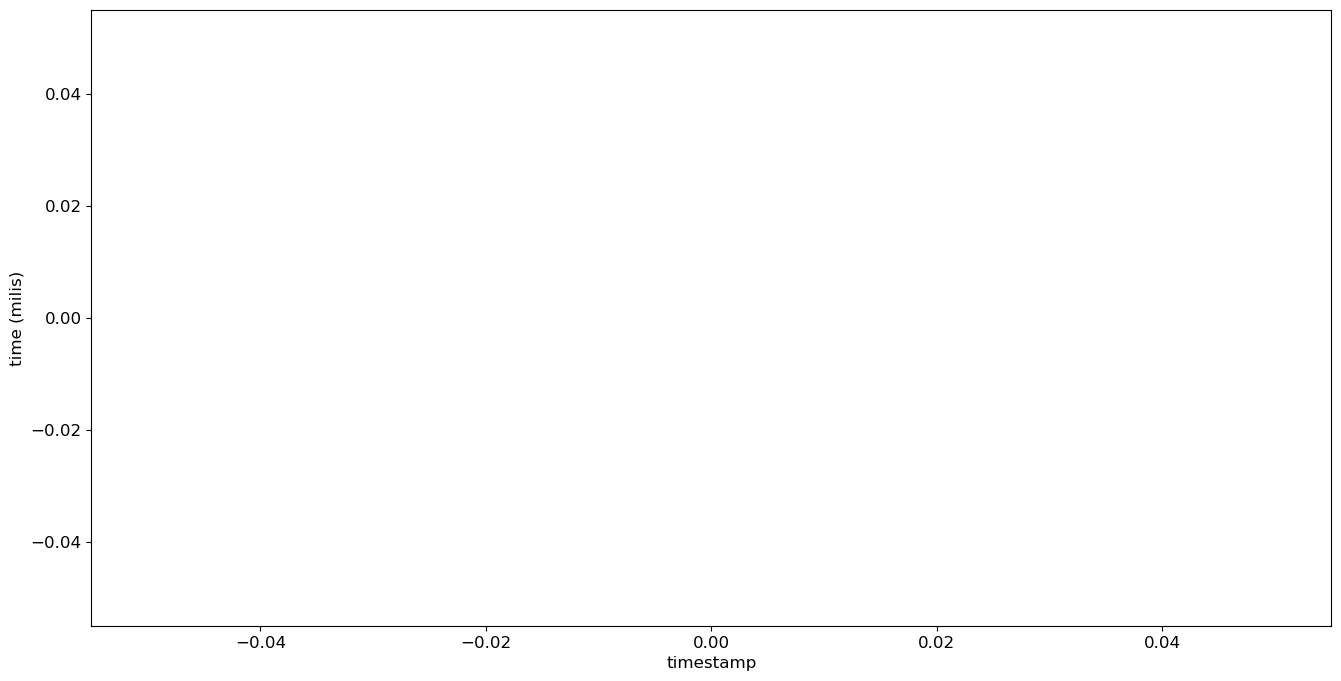

In [8]:
relative_create = create_time[create_time['name'] == 'fast (levels-6)']['time'] - create_time[create_time['name'] == 'ckqst']['time']

plt.figure(figsize=(16,8))
sns.lineplot(data=relative_create)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')

# Search time

Text(0.5, 0, 'time (milis)')

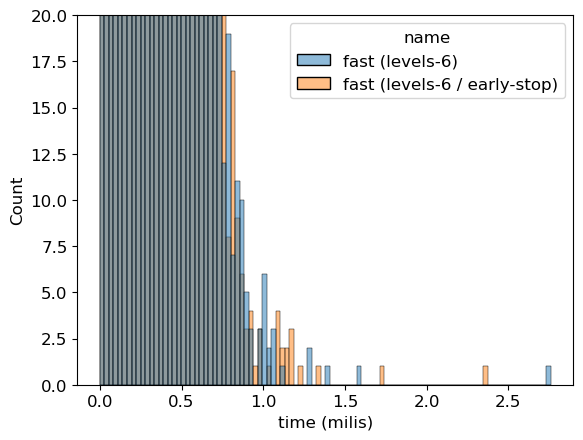

In [9]:
sns.histplot(x='time', bins=100, hue='name', multiple='layer', data=search_time)
plt.ylim(0, 20)
plt.xlabel('time (milis)')

Text(0, 0.5, 'time (milis)')

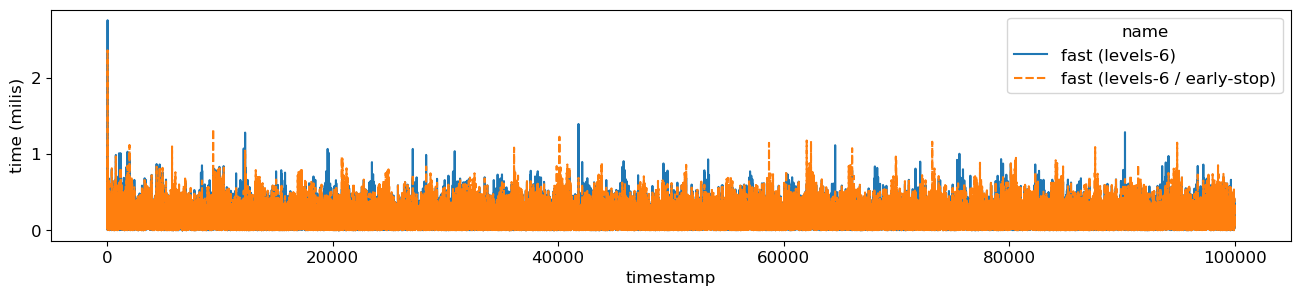

In [10]:
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='name', style='name', data=search_time)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')

Relative time (FAST vs CkQST)

Text(0, 0.5, 'time (milis)')

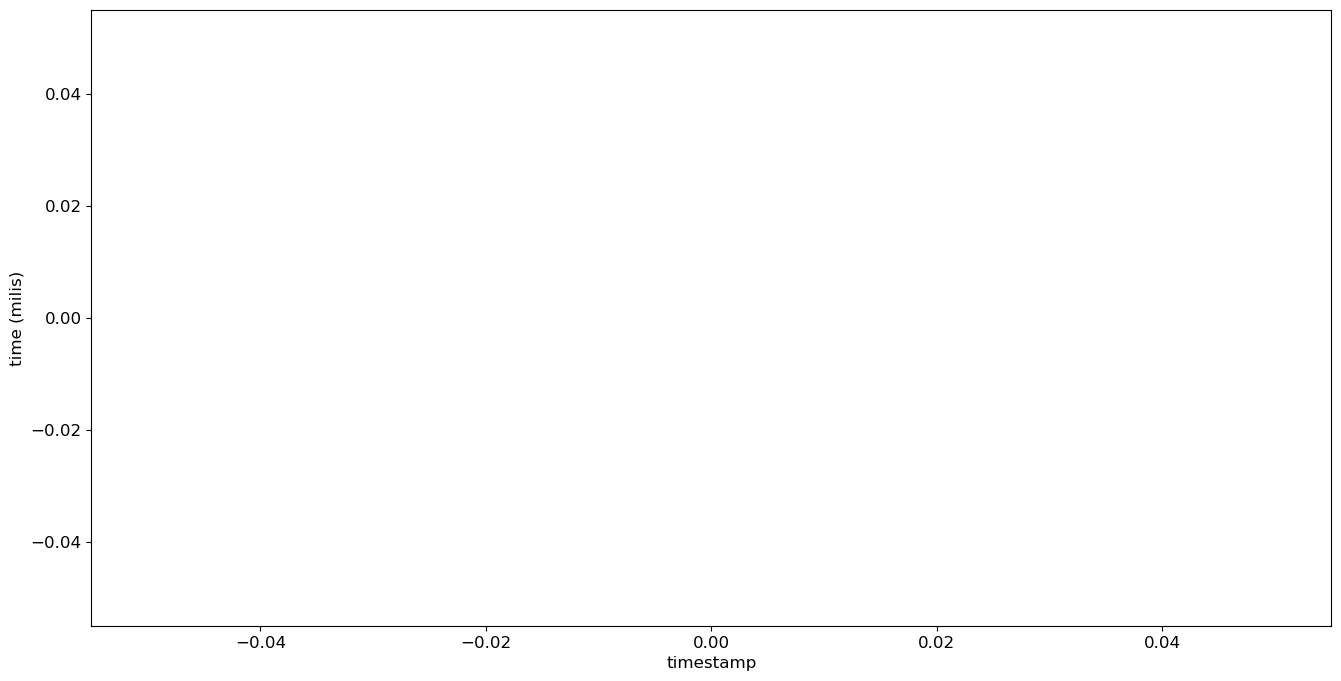

In [11]:
relative_search = search_time[search_time['name'] == 'fast (levels-6)']['time'] - search_time[search_time['name'] == 'ckqst (baseline)']['time']

plt.figure(figsize=(16,8))
sns.lineplot(data=relative_search)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')

## Load Queries

In [12]:
queries_df = pd.read_csv('../data/Places_Queries_2500000.csv');

queries_df.tail()

,id,x,y,keywords,k,ar,current_level,st,et
2499995,2499995,260.643938,110.297883,contractor,5,0.195442,9,2499995,2800001
2499996,2499996,278.661373,197.628919,used,5,3.854567,9,2499996,2800001
2499997,2499997,260.217315,69.398765,carpet|cleaners|rug,5,4.791082,9,2499997,2800001
2499998,2499998,167.413845,140.794951,regional,5,53.612263,9,2499998,2800001
2499999,2499999,256.967070,86.626912,church,5,0.874051,9,2499999,2800001


### Properties of miserable queries

In [13]:
queries_df.shape

(2500000, 9)

In [14]:
details = queries_df.join(miserable_queries.set_index('index'), on='id').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
details['ar'] = details['ar'].apply(lambda x: np.inf if x > 512 else x)
all = details.drop(columns=['current_level', 'id', 'k', 'st', 'et']).rename(columns={'time': 'insertion time (milis)'})

In [15]:
# ckqsts = all[all['name'] == 'ckqst']
# fasts = all[all['name'] == 'fast']

# fasts#.join(ckqsts, rsuffix='_')
# ckqsts
all

,x,y,keywords,ar,insertion time (milis),name
1987470,264.329550,64.280755,cat|dog|kennel,407.268244,2115.852135,fast (levels-6)
2125107,250.367601,141.276195,cat|dog|kennel,335.553987,1776.205492,fast (levels-6 / early-stop)
2125107,250.367601,141.276195,cat|dog|kennel,335.553987,1622.738780,fast (levels-6)
1888784,264.236124,80.508451,cat|dog|kennel,393.480906,1117.949632,fast (levels-6 / early-stop)
2310390,26.733268,21.889865,medical|physician|surgeon,172.235173,1097.519257,fast (levels-6 / early-stop)
...,...,...,...,...,...,...
1421066,265.363811,76.118597,foam|mfg|product,inf,50.578220,fast (levels-6 / early-stop)
2220416,137.078813,182.104242,massage|therapist,1.950029,50.382791,fast (levels-6)
942349,253.099039,145.477180,construction|equipment|general|repair,inf,50.129002,fast (levels-6 / early-stop)
1510162,188.860781,201.836340,equipment|handling|industrial|material,inf,50.104537,fast (levels-6)
